# Peaks and peak width 
- Decipher peaks and their FWHM and ignore spectra noise 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import signal
from numpy import sqrt, log # which is ln
import glob

In [18]:
def calculate_fwhm(arr_x, arr_y):
    difference = max(arr_y) - min(arr_y)
    HM = difference / 2

    pos_extremum = arr_y.argmax()  # or in your case: arr_y.argmin()

    nearest_above = (np.abs(arr_y[pos_extremum:-1] - HM)).argmin()
    nearest_below = (np.abs(arr_y[0:pos_extremum] - HM)).argmin()

    FWHM = (np.mean(arr_x[nearest_above + pos_extremum]) - 
            np.mean(arr_x[nearest_below]))
    print("max at:", max(arr_y))
    print("half max at:", HM)
    print("FWHM =", FWHM)
    
def extract_peaks(arr_x, arr_y, distance = 20, prominence = 1):
    peaks, _ = signal.find_peaks(arr_y, distance = distance, prominence = prominence)
    peak_intensities = arr_y[peaks]
    fwhm, halfpeak, start, end = signal.peak_widths(arr_y, peaks = peaks)
    return list(peaks), list(peak_intensities), list(fwhm), (list(start), list(end))

# Gaussian curve generation

In [19]:
def plot_gaussian_spectrum(peak_wavelength = 522, peak_intensity = 10, fwhm = 20):
    sigma = fwhm/(2 * sqrt(2 * log(2)))
    x = np.arange(380,781)
    y = norm.pdf(x, loc = peak_wavelength, scale = sigma)

    # rescale y to give peak intensity intended 
    y_max = max(y)
    y_multiple = peak_intensity/y_max 
    y = y_multiple * y

    fig, ax = plt.subplots()
    plt.plot(x,y)
    ax.grid(which = "both")
    plt.show()
    return x, y

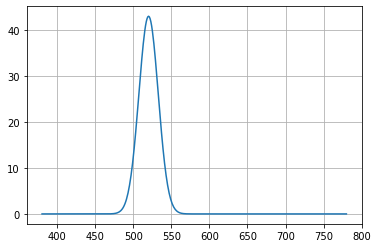

In [20]:
arr_x, arr_y = plot_gaussian_spectrum(520, 43, 30)

In [21]:
extract_peaks(arr_x, arr_y)

([140], [43.0], [30.0], ([125.0], [155.0]))

# Curve decomposition 
- Decompose spectra into individual spectra with unique peaks

# XPS spectra tooling

# UV-Vis spectra tooling